# Business Objective

A C2B firm is in the process of creating an Online platform where the consumers can sell their used Laptops. This platform should host an automated mechanism that can suggest to a consumer the realistic price of their used laptop when the required details (different features of the laptop) are provided.



## Importing required libraries

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [480]:
os.chdir(r'C:\Users\rakes\OneDrive\Desktop\Data Sets')

In [481]:
os.listdir()

['adult.csv',
 'Amazon_Products.csv',
 'BankChurners.csv',
 'boston.csv',
 'CarPrice_Assignment.csv',
 'CarPrice_Assignment_train_unclean.csv',
 'crime.csv',
 'dataset (1).csv',
 'DatingAppReviewsDataset.csv',
 'fake_job_postings.csv',
 'Iris.csv',
 'ML PROJECT',
 'netflix_titles.csv',
 'Reddit_Data.csv',
 'titanic.csv',
 'Twitter_Data.csv',
 'Y_test']

## Reading Dataset

In [482]:
df=pd.read_csv('dataset (1).csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [483]:
df.shape

(1303, 13)

In [484]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

## Checking Missing values and Data type of variables

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [486]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### There are no missing values in the data and variables Ram and Weight read as object type due to presence of units GB and kg 

## Checking duplicated rows

In [487]:
df.duplicated().sum()

0

#### There are no duplicate rows in the data

## Removing Unwanted columns

In [488]:
df['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [489]:
df.laptop_ID.unique()

array([   1,    2,    3, ..., 1318, 1319, 1320], dtype=int64)

In [490]:
df.drop(['laptop_ID','Product'],axis=1,inplace=True)

In [491]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


## Data Pre-processing

#### Converting Ram variable into integer type and Weight variable into float type

In [492]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [493]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [495]:
df['Ram']=df.Ram.astype('int64')
df['Weight']=df.Weight.astype('float64')

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## Exploratory Data Analysis

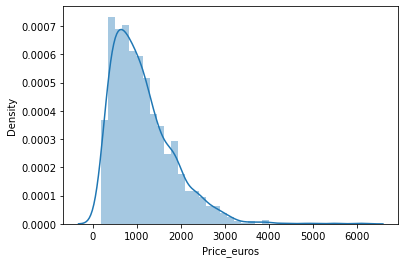

In [497]:
sns.distplot(df['Price_euros']);

#### We observe that Price_euros variable is right-skewed

### Analysis on Company variable

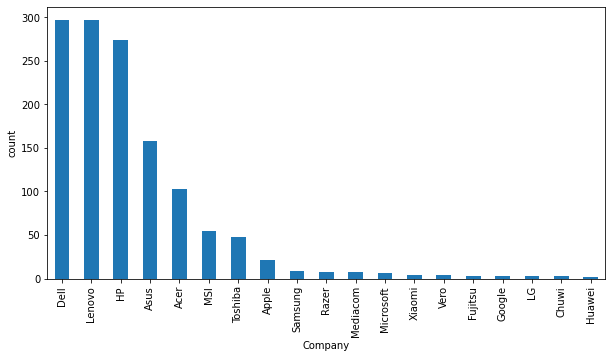

In [498]:
plt.figure(figsize=(10,5))
plt.xlabel('Company')
plt.ylabel('count')
df.Company.value_counts().plot(kind='bar');

In [499]:
df.Company.value_counts(normalize=True)

Dell         0.227936
Lenovo       0.227936
HP           0.210284
Asus         0.121259
Acer         0.079048
MSI          0.041443
Toshiba      0.036838
Apple        0.016117
Samsung      0.006907
Razer        0.005372
Mediacom     0.005372
Microsoft    0.004605
Xiaomi       0.003070
Vero         0.003070
Fujitsu      0.002302
Google       0.002302
LG           0.002302
Chuwi        0.002302
Huawei       0.001535
Name: Company, dtype: float64

#### We have Lenovo, Dell and Hp products more in the data

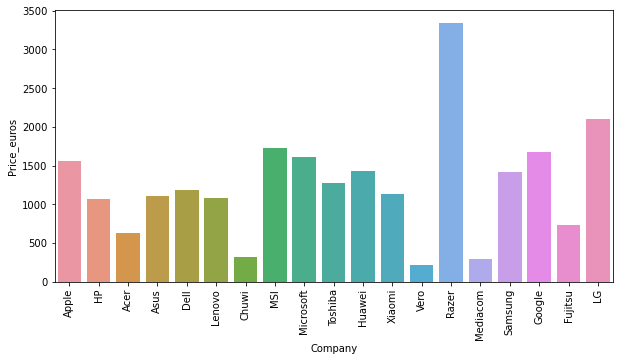

In [500]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Company',y='Price_euros',ci=None);
plt.xticks(rotation='vertical');

#### Razer and LG company laptops sold for higher price 

#### Vero, Chuwi and Mediacom company laptops sold for lower price

### Aanlysis on TypeName variable

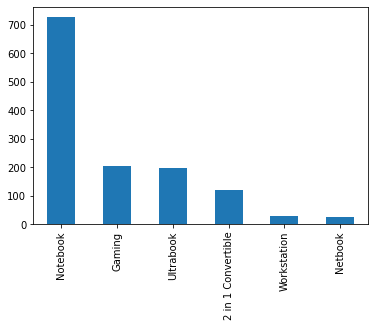

In [501]:
df['TypeName'].value_counts().plot(kind='bar');

In [502]:
q=df.TypeName.value_counts(normalize=True)
q

Notebook              0.557943
Gaming                0.157329
Ultrabook             0.150422
2 in 1 Convertible    0.092863
Workstation           0.022256
Netbook               0.019186
Name: TypeName, dtype: float64

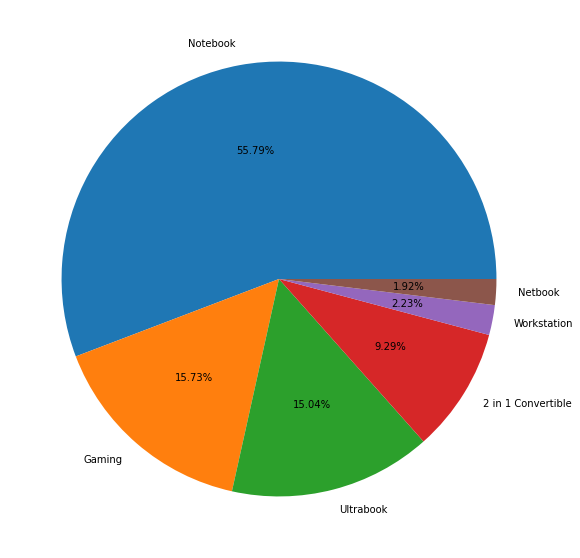

In [503]:
plt.figure(figsize=(10,10))
plt.pie(q,labels=['Notebook','Gaming','Ultrabook','2 in 1 Convertible','Workstation','Netbook'],autopct='%1.2f%%')
plt.show()

#### Notebook laptops have been sold more and Netbook are less sold

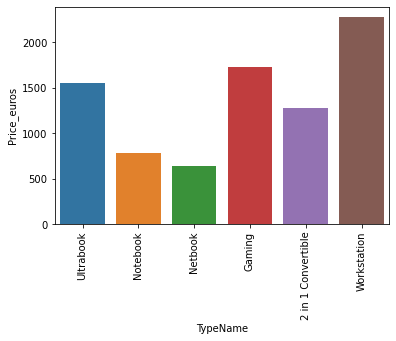

In [504]:
sns.barplot(data=df,x='TypeName',y='Price_euros',ci=None);
plt.xticks(rotation='vertical');

#### Workstation, Gaming and Ultrabook type laptops are sold for more price
#### Netbook type laptops are sold for less price

### Analysis on Inches variable

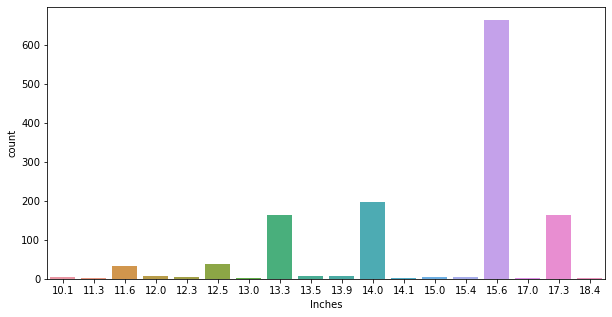

In [505]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Inches');

#### 15.6 inch laptops are more in the data

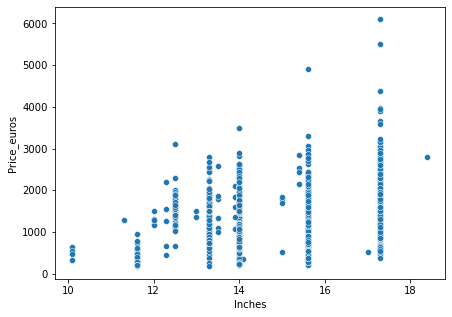

In [506]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Inches',y='Price_euros');

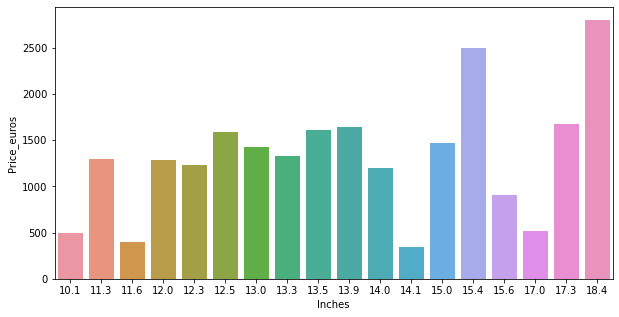

In [507]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Inches',y='Price_euros',ci=None);

#### 18.4 inch and 15.4 inch laptops are sold for higher price


#### 11.6,14.1 and 10.1 inch laptops are sold for least price

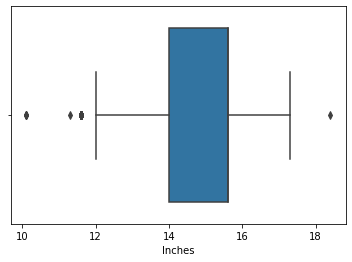

In [508]:
sns.boxplot(data=df,x='Inches');

### Analysis on ScreenResolution variable

In [509]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [510]:
df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1303, dtype: int64

### Creating a new variable for laptops which are Touchscreen

In [511]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [512]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,0


In [513]:
r=df.Touchscreen.value_counts(normalize=True)
r

0    0.852648
1    0.147352
Name: Touchscreen, dtype: float64

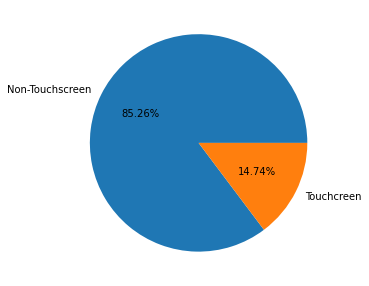

In [514]:
plt.figure(figsize=(7,5))
plt.pie(r,labels=['Non-Touchscreen','Touchcreen'],autopct='%1.2f%%')
plt.show()

#### Only 14% of the laptops in the data are Touchscreen

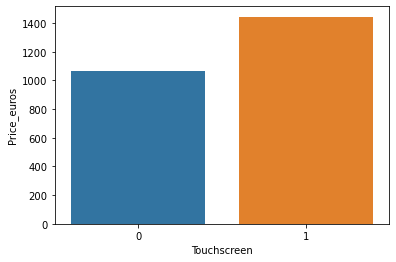

In [515]:
sns.barplot(data=df,x='Touchscreen',y='Price_euros',ci=None);

#### Touch screen laptops are slightly more cost than other laptops

### Creating a new variable for laptops which have IPS display

In [516]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [517]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


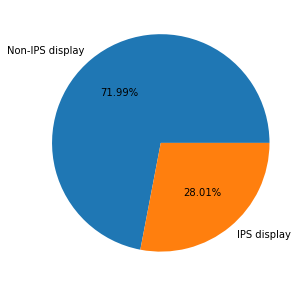

In [518]:
s=df.IPS.value_counts(normalize=True)
plt.figure(figsize=(7,5))
plt.pie(s,labels=['Non-IPS display','IPS display'],autopct='%1.2f%%')
plt.show()

#### Only 28% of the laptops in the data have IPS display

In [519]:
s

0    0.719877
1    0.280123
Name: IPS, dtype: float64

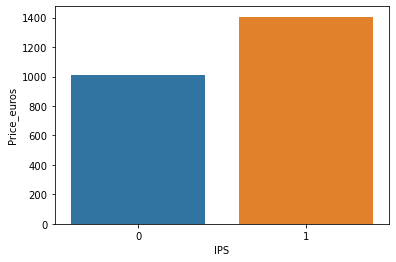

In [520]:
sns.barplot(data=df,x='IPS',y='Price_euros',ci=None);

#### IPS laptops are slightly more cost than other laptops

In [521]:
df['ScreenResolution'].str.split('x',expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [522]:
Res=df['ScreenResolution'].str.split('x',expand=True)

### Creating two new variables x_res and y_res

In [523]:
df['x_res']=Res[0]
df['y_res']=Res[1]

In [524]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [525]:
df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: x_res, Length: 1303, dtype: object

In [526]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [527]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [529]:
df['x_res']=df['x_res'].astype('int64')
df['y_res']=df['y_res'].astype('int64')

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [531]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price_euros, dtype: float64

#### Inches have very less correlation with price hence we will make a new column Pixels per inches(PPI)
#### we can eliminate resolution column by replacing it with PPI.

### Creating a new variable PPI from x_res, y_res and Inches variables

In [532]:
df['PPI']=((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']

In [533]:
df['PPI']=df['PPI'].astype('float64')

In [534]:
df['PPI']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1303, dtype: float64

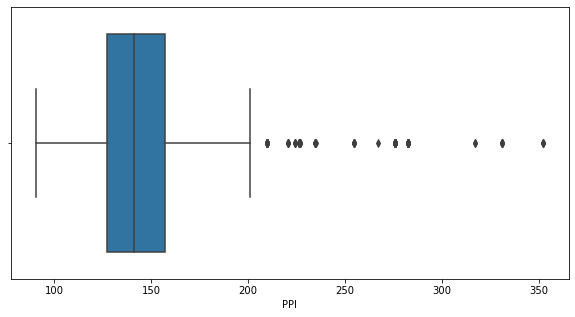

In [535]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='PPI');

In [536]:
df.PPI.describe([0.88,0.85,0.90,0.95,0.99])

count    1303.000000
mean      146.635987
std        43.121345
min        90.583402
50%       141.211998
85%       165.632118
88%       165.632118
90%       176.232574
95%       254.671349
99%       282.423996
max       352.465147
Name: PPI, dtype: float64

In [537]:
df['PPI']=np.where(df['PPI']>210,210,df['PPI'])

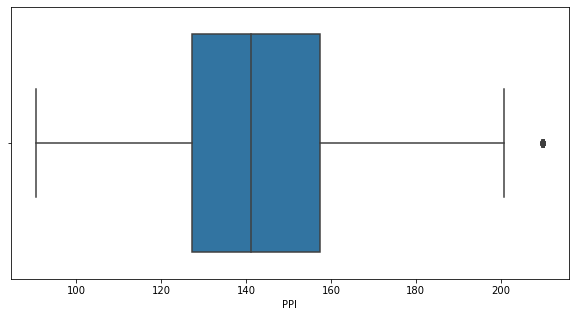

In [538]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='PPI');

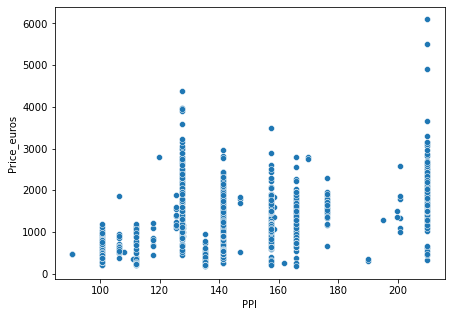

In [539]:
plt.figure(figsize=(7,5))
sns.scatterplot(df['PPI'],df['Price_euros']);

In [540]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.495019
Name: Price_euros, dtype: float64

In [541]:
df.drop('ScreenResolution',axis=1,inplace=True)

In [542]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,210.000000
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,210.000000
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,210.000000


In [543]:
df.drop(['Inches','x_res','y_res'],inplace=True,axis=1)

In [544]:
df.corr()['Price_euros']

Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.495019
Name: Price_euros, dtype: float64

In [545]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,210.000000
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998


### Analysis on Cpu variable

In [546]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i7 6920HQ 2.9GHz        1
Intel Core i3 6006U 2.2GHz         1
AMD E-Series 9000 2.2GHz           1
Intel Core i5 7200U 2.70GHz        1
Samsung Cortex A72&A53 2.0GHz      1
Name: Cpu, Length: 118, dtype: int64

In [547]:
df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu, Length: 1303, dtype: object

In [548]:
df['Cpu_brand']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [549]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,210.000000,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,210.000000,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,210.000000,Intel Core i5


In [550]:
def processor(x):
    if x=='Intel Core i7' or x=='Intel Core i5' or x=='Intel Core i3':
        return x
    else:
        if x.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        

In [551]:
df['Cpu_brand']=df['Cpu_brand'].apply(processor)

In [552]:
df.tail()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0,1,1,210.000000,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,0,100.454670,Intel Core i7
1302,Asus,Notebook,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,0,0,100.454670,Other Intel Processor


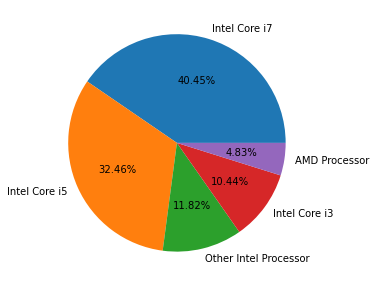

In [553]:
j=df.Cpu_brand.value_counts(normalize=True)
plt.figure(figsize=(15,5))
plt.pie(j,labels=['Intel Core i7','Intel Core i5','Other Intel Processor','Intel Core i3','AMD Processor'],autopct='%1.2f%%');


#### Intel i7 and i5 laptops are more in the given data

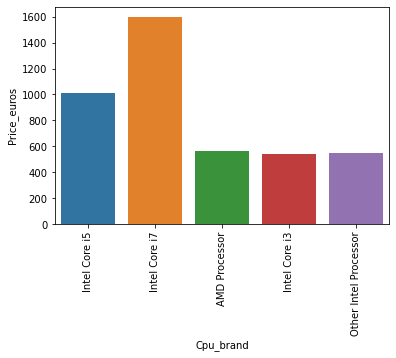

In [554]:
sns.barplot(x=df['Cpu_brand'],y=df['Price_euros'],ci=None);
plt.xticks(rotation='vertical');

#### Intel core i7 and i5 laptops are sold for high price
#### All the other processors are sold for a similar lower price

In [555]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,210.000000,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,210.000000,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,210.000000,Intel Core i5


In [556]:
df.drop(['Cpu'],axis=1,inplace=True)

In [557]:
df.tail()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0,1,1,210.000000,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,0,100.454670,Intel Core i7
1302,Asus,Notebook,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,0,0,100.454670,Other Intel Processor


### Analysis on Ram variable

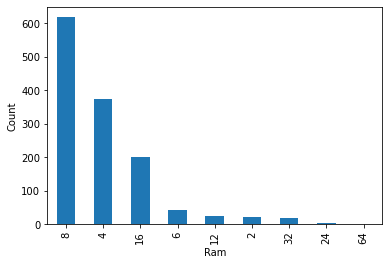

In [558]:
plt.xlabel('Ram')
plt.ylabel('Count')
df['Ram'].value_counts().plot(kind='bar');

#### 8 and 4GB ram laptops are more in the data

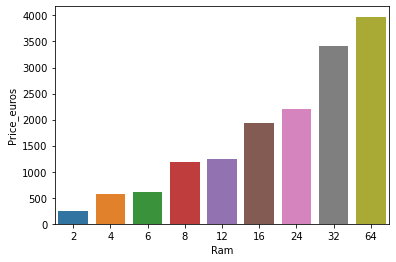

In [559]:
sns.barplot(data=df,x='Ram',y='Price_euros',ci=None);

#### Laptops with 64 and 32GB Ram are sold for higher price
#### Laptops with 2,4 and 4GB Ram are sold for lower price
#### Price of Laptop is increasing with Ram size

### Analysis on Memory variable

In [560]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
128GB HDD                          1
5

#### Creating four columns which are HDD, SSD, Hybrid and  Flash_storage 

In [561]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,210.000000,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,210.000000,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,210.000000,Intel Core i5


In [562]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [563]:
df['Memory1']=df['Memory'].str.split('+')
df['Memory1'].sample(5)

1170                [256GB SSD]
544                 [500GB HDD]
469                 [256GB SSD]
1099    [128GB SSD ,   1TB HDD]
555                 [500GB HDD]
Name: Memory1, dtype: object

In [564]:
def SSD(text):
    res=0
    for i in text:
        if 'SSD' in i:
            res=i.strip()
            if 'TB' in res:
                res=res[:-6]
                return int((res))*1000
            else:
                res=res[:-6]
                return int(float(res))
    return res
df['SSD']=df['Memory1'].apply(SSD)
df['SSD'].value_counts()

256     500
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
8         1
64        1
240       1
Name: SSD, dtype: int64

In [565]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,Memory1,SSD
1135,Lenovo,Notebook,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,1099.00,0,0,141.211998,Intel Core i7,[1.0TB Hybrid],0
1123,Dell,Notebook,4,500GB HDD,Intel HD Graphics 520,Linux,2.09,523.63,0,0,100.454670,Intel Core i5,[500GB HDD],0
1004,Toshiba,Notebook,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,1195.00,0,0,165.632118,Intel Core i5,[128GB SSD],128
1006,HP,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,1205.00,0,0,157.350512,Intel Core i5,[256GB SSD],256
332,Asus,Notebook,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.00,1334.00,0,0,157.350512,Intel Core i7,"[256GB SSD , 1TB HDD]",256


In [566]:
def HDD(text):
    l=len(text)
    res=0
    for i in text:
        if 'HDD' in i:
            res=i.strip()
            if 'TB' in res:
                res=res[:-6]
                return int(float(res))*1000
            else:
                res=res[:-6]
                return int(float(res))
    return res
df['HDD']=df['Memory1'].apply(HDD)
df['HDD'].value_counts()

0       727
1000    409
500     134
2000     31
32        1
128       1
Name: HDD, dtype: int64

In [567]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,Memory1,SSD,HDD
881,HP,2 in 1 Convertible,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.30,684.80,1,0,100.454670,Intel Core i5,[500GB HDD],0,500
1286,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,111.935204,Other Intel Processor,[64GB Flash Storage],0,0
813,Dell,Notebook,8,1TB HDD,Nvidia GeForce GT 940MX,Windows 10,1.98,961.00,0,0,141.211998,Intel Core i7,[1TB HDD],0,1000
394,Dell,Notebook,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,778.87,0,0,141.211998,Intel Core i7,[256GB SSD],256,0
345,Lenovo,Gaming,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,1129.00,0,1,141.211998,Intel Core i7,"[256GB SSD , 2TB HDD]",256,2000
110,Asus,Ultrabook,16,256GB SSD + 1TB HDD,Nvidia GeForce MX150,Windows 10,1.50,1262.00,0,0,141.211998,Intel Core i7,"[256GB SSD , 1TB HDD]",256,1000
707,Lenovo,Workstation,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18,1855.00,0,0,141.211998,Intel Core i7,[512GB SSD],512,0
795,Lenovo,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,2330.00,1,1,209.800683,Intel Core i5,[256GB SSD],256,0
1216,Acer,Notebook,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,598.00,0,0,106.113062,Intel Core i3,[1TB HDD],0,1000
690,Acer,Notebook,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,375.00,0,0,111.935204,Other Intel Processor,[32GB Flash Storage],0,0


In [568]:
def Flash(text):
    l=len(text)
    res=0
    for i in text:
        if 'Flash Storage' in i:
            res=i.strip()
            if 'TB' in res:
                res=res[:-16]
                return int(float(res))*1000
            else:
                res=res[:-16]
                return int(float(res))
    return res
df['Flash Storage']=df['Memory1'].apply(Flash)
df['Flash Storage'].value_counts()

0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash Storage, dtype: int64

In [569]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,Memory1,SSD,HDD,Flash Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,210.000000,Intel Core i5,[128GB SSD],128,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,[128GB Flash Storage],0,0,128
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,[256GB SSD],256,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,210.000000,Intel Core i7,[512GB SSD],512,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,210.000000,Intel Core i5,[256GB SSD],256,0,0


In [570]:
def Hybrid(text):
    l=len(text)
    res=0
    for i in text:
        if 'Hybrid' in i:
            res=i.strip()
            if 'TB' in res:
                res=res[:-9]
                return int(float(res))*1000
            else:
                res=res[:-9]
                return int(float(res))
    return res
df['Hybrid']=df['Memory1'].apply(Hybrid)
df['Hybrid'].value_counts()

0       1291
1000      11
508        1
Name: Hybrid, dtype: int64

In [571]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,Memory1,SSD,HDD,Flash Storage,Hybrid
476,Dell,Workstation,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,2408.00,0,0,141.211998,Intel Core i7,[256GB SSD],256,0,0,0
693,Lenovo,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,2590.00,1,0,209.800683,Intel Core i7,[256GB SSD],256,0,0,0
1226,Dell,Ultrabook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,1477.00,1,0,210.000000,Intel Core i7,[256GB SSD],256,0,0,0
685,Dell,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,2813.75,0,0,141.211998,Intel Core i7,"[256GB SSD , 1TB HDD]",256,1000,0,0
433,Lenovo,Workstation,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.30,2445.00,0,1,210.000000,Intel Core i7,[512GB SSD],512,0,0,0
255,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.41,949.00,0,0,165.632118,Intel Core i5,[256GB SSD],256,0,0,0
1243,Dell,2 in 1 Convertible,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.77,1799.00,1,0,127.335675,Intel Core i7,[512GB SSD],512,0,0,0
549,Lenovo,Notebook,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.99,1729.00,0,1,141.211998,Intel Core i7,[512GB SSD],512,0,0,0
792,Lenovo,2 in 1 Convertible,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,1970.00,1,1,165.632118,Intel Core i7,[512GB SSD],512,0,0,0
887,Asus,Gaming,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,1369.90,0,0,127.335675,Intel Core i5,"[128GB SSD , 1TB HDD]",128,1000,0,0


In [572]:
df[df['Memory'] =='1.0TB Hybrid']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,Memory1,SSD,HDD,Flash Storage,Hybrid
151,Dell,Gaming,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,899.00,0,0,141.211998,Intel Core i7,[1.0TB Hybrid],0,0,0,1000
1010,Dell,Gaming,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,949.00,0,0,141.211998,Intel Core i5,[1.0TB Hybrid],0,0,0,1000
1135,Lenovo,Notebook,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,1099.00,0,0,141.211998,Intel Core i7,[1.0TB Hybrid],0,0,0,1000
1158,Lenovo,Notebook,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.50,788.49,0,0,141.211998,Intel Core i5,[1.0TB Hybrid],0,0,0,1000
1176,Lenovo,Notebook,4,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32,825.00,0,0,141.211998,Intel Core i7,[1.0TB Hybrid],0,0,0,1000
1258,Lenovo,Notebook,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,895.00,0,0,141.211998,Intel Core i7,[1.0TB Hybrid],0,0,0,1000
1266,HP,Notebook,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99,0,0,141.211998,AMD Processor,[1.0TB Hybrid],0,0,0,1000
1280,HP,Notebook,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99,0,0,141.211998,AMD Processor,[1.0TB Hybrid],0,0,0,1000
1294,HP,Notebook,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99,0,0,141.211998,AMD Processor,[1.0TB Hybrid],0,0,0,1000


In [573]:
df.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.495019
SSD              0.676202
HDD             -0.095672
Flash Storage   -0.040511
Hybrid           0.007989
Name: Price_euros, dtype: float64

#### There is strong correlation between the variables Ram and price ,SSD and price,PPI and price.
#### There is weak correlation for the variables HDD,flash storage,Hybrid. 

In [574]:
df.drop(['Flash Storage','Hybrid','HDD'],axis=1,inplace=True)

In [575]:
df.drop(['Memory1','Memory'],axis=1,inplace=True)

In [576]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,210.000000,Intel Core i5,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,210.000000,Intel Core i7,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,210.000000,Intel Core i5,256


### Analysis on SSD variable

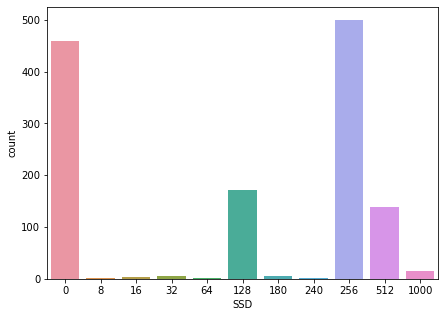

In [577]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='SSD');

#### Laptops with 256GB SSD and No SSD are more in the given data

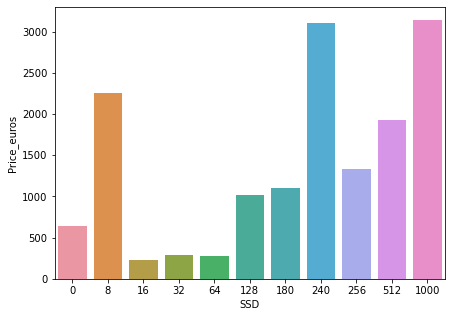

In [578]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='SSD',y='Price_euros',ci=None);

#### Laptops with 1TB and 240GB SSD are high priced laptops

### Analysis on Gpu variable

In [579]:
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R7 M360           1
AMD Radeon R3                1
ARM Mali T860 MP4            1
Intel Iris Pro Graphics      1
Nvidia Quadro M620M          1
Name: Gpu, Length: 110, dtype: int64

In [580]:
df['Gpu'].apply(lambda x:x.split()[0] )

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

#### Creating a new variable Gpu_brand

In [581]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [582]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,210.000000,Intel Core i5,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,210.000000,Intel Core i7,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,210.000000,Intel Core i5,256,Intel


In [583]:
df.Gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

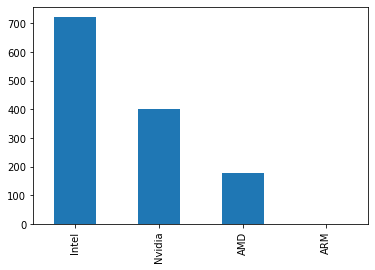

In [584]:
df.Gpu_brand.value_counts().plot(kind='bar');

In [585]:
df=df[df['Gpu_brand']!='ARM']

In [586]:
df.Gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

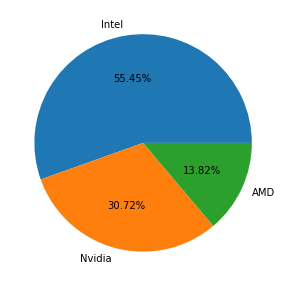

In [587]:
k=df['Gpu_brand'].value_counts(normalize=True)
plt.figure(figsize=(15,5))
plt.pie(k,labels=['Intel','Nvidia','AMD'],autopct='%1.2f%%');

#### Almost 55% of the laptops have Intel graphic processor
#### Only 13% of the laptops have AMD graphic processor

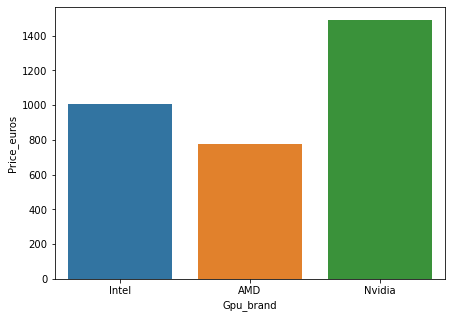

In [588]:
plt.figure(figsize=(7,5))
sns.barplot(df['Gpu_brand'],df['Price_euros'],ci=None);

#### Intel is the most used Gpu among the data
#### AMD is the least used Gpu among the data

In [589]:
df.drop('Gpu',axis=1,inplace=True)

In [590]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,210.000000,Intel Core i5,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,210.000000,Intel Core i7,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,210.000000,Intel Core i5,256,Intel


### Analysis on OpSys variable

In [591]:
df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

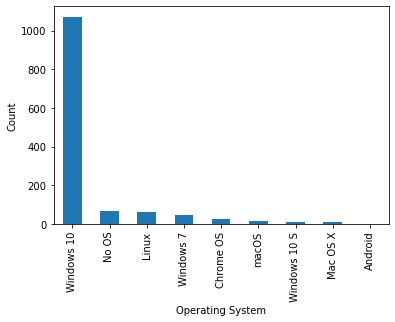

In [592]:
plt.xlabel('Operating System')
plt.ylabel('Count')
df.OpSys.value_counts().plot(kind='bar');

#### Windows 10 is most used Operating system in the data
#### Android ,Windows 10 S and Mac OS X are least used Operating systems in the data

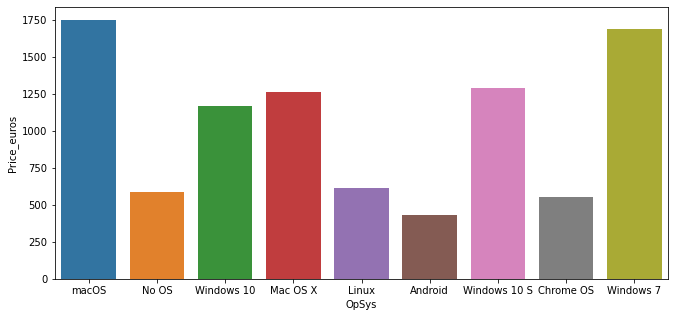

In [593]:
plt.figure(figsize=(11,5))
sns.barplot(data=df,x='OpSys',y='Price_euros',ci=None);

#### 1.The Laptops whose operating system is MacOS have high price 1750 euros followed by the laptops of operating system Windows 7.
#### 2.The laptops having windows 10 S and mac OS X have almost similar price.

In [594]:
def os(x):
    if x=='Windows 10' or x=='Windows 7' or x=='Windows 10 S':
        return 'Windows'
    elif x=='macOS' or x=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

#### Creating new variable OS

In [595]:
df['OS']=df['OpSys'].apply(os)

In [596]:
df.OS.value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: OS, dtype: int64

In [597]:
t=df.OS.value_counts(normalize=True)
t

Windows               0.864055
Others/No OS/Linux    0.119816
Mac                   0.016129
Name: OS, dtype: float64

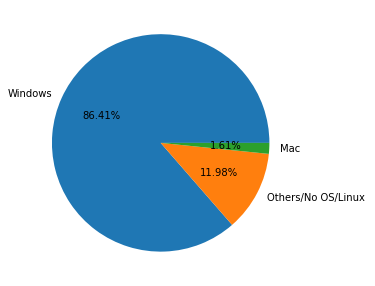

In [598]:
t=df['OS'].value_counts(normalize=True)
plt.figure(figsize=(15,5))
plt.pie(t,labels=['Windows','Others/No OS/Linux ','Mac'],autopct='%1.2f%%');

#### Almost 86% of the laptops have Windows Operating system

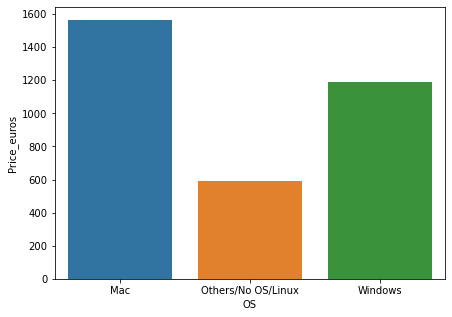

In [599]:
plt.figure(figsize=(7,5))
sns.barplot(df['OS'],df['Price_euros'],ci=None);

#### Laptops with Mac operating system are more priced laptops

In [600]:
df.drop('OpSys',axis=1,inplace=True)

In [601]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,SSD,Gpu_brand,OS
83,Lenovo,Notebook,4,2.20,399.0,0,0,141.211998,AMD Processor,128,AMD,Windows
911,HP,Ultrabook,8,1.09,3100.0,1,0,210.000000,Other Intel Processor,240,Intel,Windows
1264,Dell,Notebook,2,2.20,379.0,0,0,100.454670,Other Intel Processor,0,Intel,Windows
859,Lenovo,Notebook,4,2.20,469.0,0,0,141.211998,Intel Core i3,0,Intel,Others/No OS/Linux
1078,Lenovo,Notebook,4,2.10,540.0,0,0,100.454670,Intel Core i5,0,Intel,Windows


### Unique values percentage

In [602]:
df.describe([0.01,0.05,0.95,0.99,0.25,0.75]).round(2)

,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD
count,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00,1302.00
mean,8.39,2.04,1124.04,0.15,0.28,142.06,182.89
std,5.09,0.67,699.16,0.35,0.45,30.01,184.82
min,2.00,0.69,174.00,0.00,0.00,90.58,0.00
1%,2.00,0.97,229.00,0.00,0.00,100.45,0.00
5%,4.00,1.17,309.00,0.00,0.00,100.45,0.00
25%,4.00,1.50,599.00,0.00,0.00,127.34,0.00
50%,8.00,2.04,978.00,0.00,0.00,141.21,256.00
75%,8.00,2.30,1488.44,0.00,1.00,157.35,256.00
95%,16.00,3.20,2448.80,1.00,1.00,210.00,512.00


In [603]:
for i in df.columns:
    print(i,'------>',round((df[i].nunique()/df.shape[0])*100,3))

Company ------> 1.459
TypeName ------> 0.461
Ram ------> 0.691
Weight ------> 13.134
Price_euros ------> 60.753
Touchscreen ------> 0.154
IPS ------> 0.154
PPI ------> 1.997
Cpu_brand ------> 0.384
SSD ------> 0.845
Gpu_brand ------> 0.23
OS ------> 0.23


In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   Weight       1302 non-null   float64
 4   Price_euros  1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   PPI          1302 non-null   float64
 8   Cpu_brand    1302 non-null   object 
 9   SSD          1302 non-null   int64  
 10  Gpu_brand    1302 non-null   object 
 11  OS           1302 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 164.5+ KB


In [605]:
df.describe([0.01,0.05,0.25,0.75,0.95,0.99])

,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,8.385561,2.039416,1124.043894,0.146697,0.27957,142.059061,182.890937
std,5.085166,0.665274,699.158856,0.353940,0.44896,30.014002,184.823639
min,2.000000,0.690000,174.000000,0.000000,0.00000,90.583402,0.000000
1%,2.000000,0.970000,229.000000,0.000000,0.00000,100.454670,0.000000
5%,4.000000,1.170000,309.000000,0.000000,0.00000,100.454670,0.000000
25%,4.000000,1.500000,599.000000,0.000000,0.00000,127.335675,0.000000
50%,8.000000,2.040000,978.000000,0.000000,0.00000,141.211998,256.000000
75%,8.000000,2.300000,1488.435000,0.000000,1.00000,157.350512,256.000000
95%,16.000000,3.200000,2448.800000,1.000000,1.00000,210.000000,512.000000


### Analysis on Weight variable

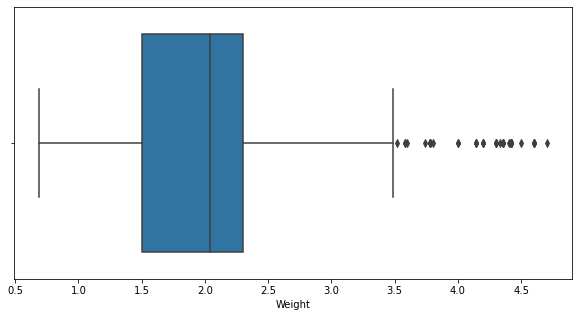

In [606]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Weight');

#### Removing outliers by using capping method

In [607]:
df['Weight']=np.where(df['Weight']>3.5,3.5,df['Weight'])

In [608]:
df.describe([0.99,0.95,0.96])

,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,8.385561,2.014585,1124.043894,0.146697,0.27957,142.059061,182.890937
std,5.085166,0.590207,699.158856,0.353940,0.44896,30.014002,184.823639
min,2.000000,0.690000,174.000000,0.000000,0.00000,90.583402,0.000000
50%,8.000000,2.040000,978.000000,0.000000,0.00000,141.211998,256.000000
95%,16.000000,3.200000,2448.800000,1.000000,1.00000,210.000000,512.000000
96%,16.000000,3.350000,2536.312000,1.000000,1.00000,210.000000,512.000000
99%,32.000000,3.500000,3148.983700,1.000000,1.00000,210.000000,1000.000000
max,64.000000,3.500000,6099.000000,1.000000,1.00000,210.000000,1000.000000


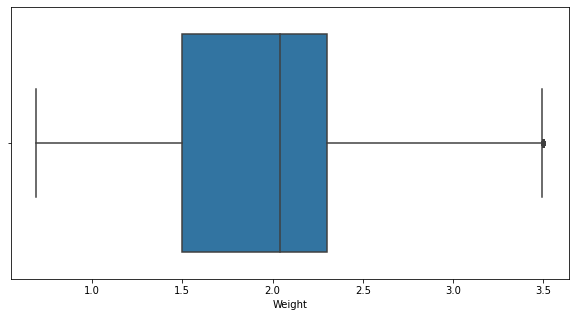

In [609]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Weight');

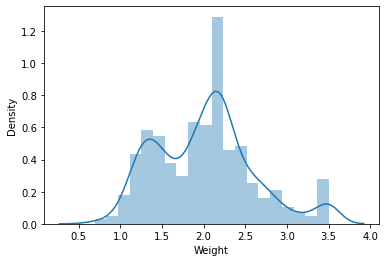

In [610]:
sns.distplot(df.Weight);

#### Laptops among 1, 2 and 3 kg weight are more in the data

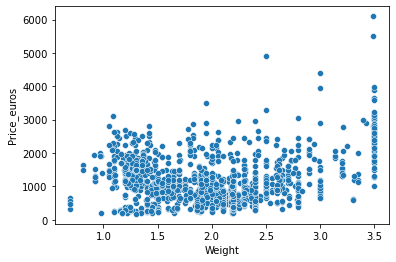

In [611]:
sns.scatterplot(data=df,x='Weight',y='Price_euros');

#### Laptops among 1, 2 and 3 kg weight are of similar price ie., 0-2500 euros 

In [612]:
df.corr()['Price_euros']

Ram            0.742905
Weight         0.146498
Price_euros    1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.497232
SSD            0.676066
Name: Price_euros, dtype: float64

### Multicollinearity matrix of all the variables

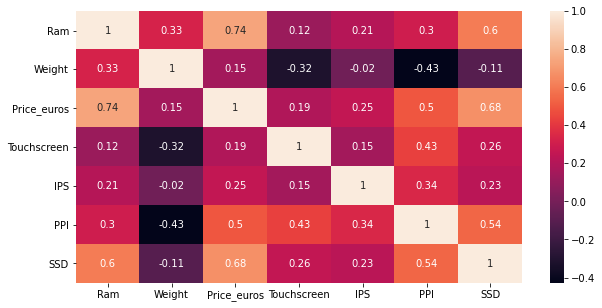

In [613]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True);

## VIF values for all variables

In [614]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [615]:
X=df[['Ram','Weight','Touchscreen','IPS','PPI','SSD']]
X=sm.add_constant(X)
vif_data=pd.DataFrame({'variables':X.columns[1:],'VIF':[variance_inflation_factor(X.values,i+1) for i in range(len(X.columns[1:]))]})
vif_data

,variables,VIF
0,Ram,2.215408
1,Weight,1.835519
2,Touchscreen,1.274273
3,IPS,1.161644
4,PPI,2.137900
5,SSD,2.082202


## Model Buliding

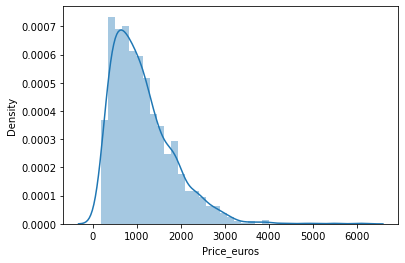

In [616]:
sns.distplot(df['Price_euros']);

### Changing the distibution of Price_euros from right-skewed to normal distribution

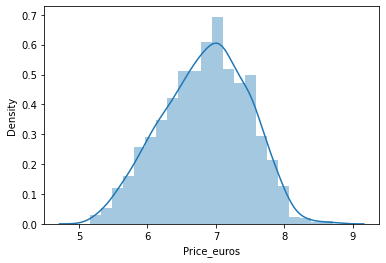

In [617]:
sns.distplot(np.log(df['Price_euros']));

In [618]:
X=df.drop('Price_euros',axis=1)
y=np.log(df['Price_euros'])

In [619]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.37,0,1,210.000000,Intel Core i5,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,210.000000,Intel Core i7,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,210.000000,Intel Core i5,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,210.000000,Intel Core i7,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,AMD,Windows


In [620]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

### Importing all the required metrics from Sci-kit learn

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [622]:
obj_cols=list(df.select_dtypes(include='object'))

In [623]:
obj_cols

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'OS']

#### Creating dummy variables for all categorical features

In [624]:
pd.get_dummies(data=df,columns=obj_cols)

,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,Company_Acer,Company_Apple,Company_Asus,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Mac,OS_Others/No OS/Linux,OS_Windows
0,8,1.37,1339.69,0,1,210.000000,128,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,8,1.34,898.94,0,0,127.677940,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,8,1.86,575.00,0,0,141.211998,256,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,16,1.83,2537.45,0,1,210.000000,512,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,8,1.37,1803.60,0,1,210.000000,256,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,638.00,1,1,157.350512,128,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1299,16,1.30,1499.00,1,1,210.000000,512,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1300,2,1.50,229.00,0,0,111.935204,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1301,6,2.19,764.00,0,0,100.454670,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [625]:
DF=pd.get_dummies(data=df,columns=obj_cols)

In [626]:
X=DF.drop('Price_euros',axis=1)
y=np.log(DF['Price_euros'])

In [627]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)  

In [628]:
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
y_pred =tree_model.predict(X_test)

In [629]:
print(r2_score(y_test,y_pred))

0.8465805514615936


In [630]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.17958758713782946

In [631]:
#Original Mean absolute error
original_mae=np.exp(mae)
original_mae

1.1967237170824296

In [632]:
from sklearn import tree

### Plotting Decision Tree Regression model

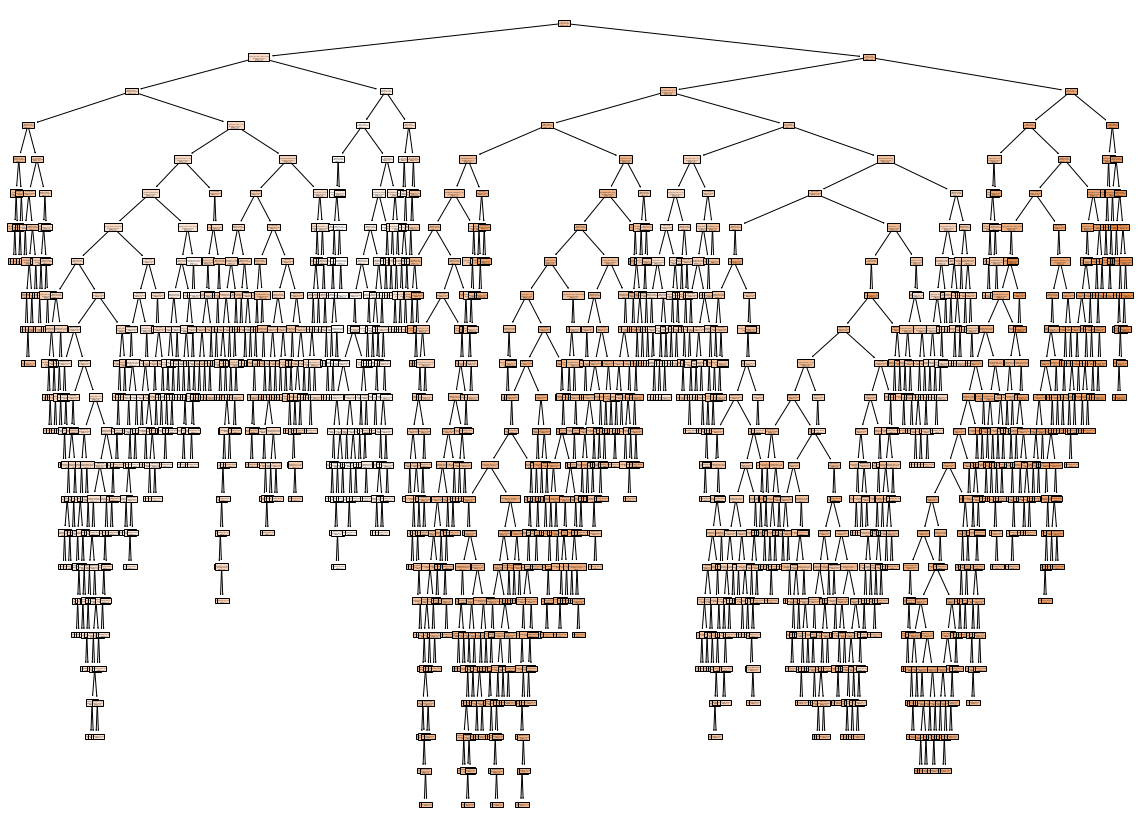

In [633]:
plt.figure(figsize=(20,15))
tree.plot_tree(tree_model,filled=True,feature_names=X_train.columns);

### Comparing Train and Test performances`

In [634]:
def compare_train_test(model):
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    print("Training-model Accuracy:",round(model.score(X_train,y_train)*100,2))
    print("Testing-model Accuracy:",round(model.score(X_test,y_test)*100,2))
    print('Mean Absolute error of testing data:',np.exp(mean_absolute_error(y_test,y_pred)))
    print(np.sqrt(mean_absolute_error(y_test,y_pred)))

In [635]:
compare_train_test(tree_model)

Training-model Accuracy: 99.46
Testing-model Accuracy: 84.66
Mean Absolute error of testing data: 1.1967237170824296
0.4237777567756824


### Pruning Decision Tree Regression model

In [636]:
pruned_model=DecisionTreeRegressor(random_state=1,min_samples_split=5)
pruned_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_split=5, random_state=1)

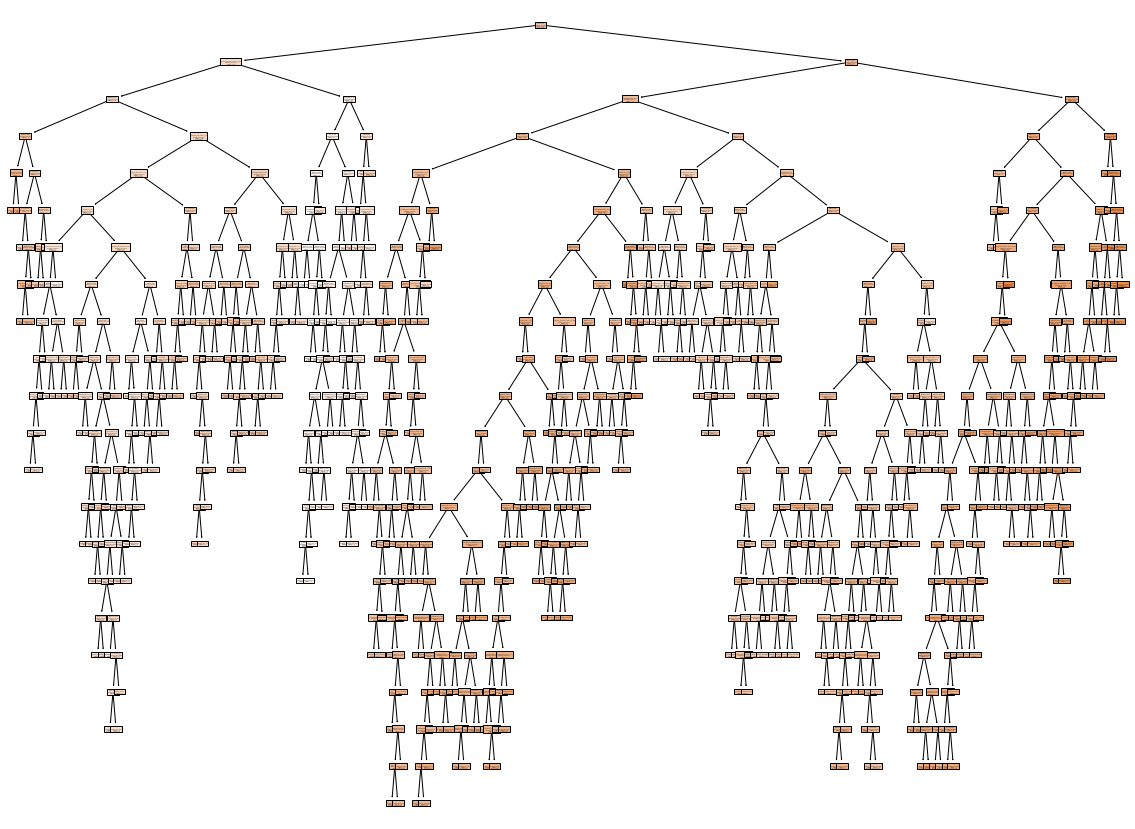

In [637]:
plt.figure(figsize=(20,15))
tree.plot_tree(pruned_model,filled=True,feature_names=X_train.columns);

In [638]:
compare_train_test(pruned_model)

Training-model Accuracy: 97.8
Testing-model Accuracy: 84.04
Mean Absolute error of testing data: 1.1967237170824296
0.4237777567756824


### Hyperparameter tuning using GridSearch 

In [639]:
from sklearn.model_selection import GridSearchCV

In [640]:
variable_options = {'max_depth':range(1,15),'min_samples_split': range(1,60)}

In [641]:
gs=GridSearchCV(tree_model,variable_options,scoring='r2')
gs.fit(X_train,y_train)
gs.best_params_

{'max_depth': 13, 'min_samples_split': 15}

### By using hyperparameter values plotting a Decision Tree

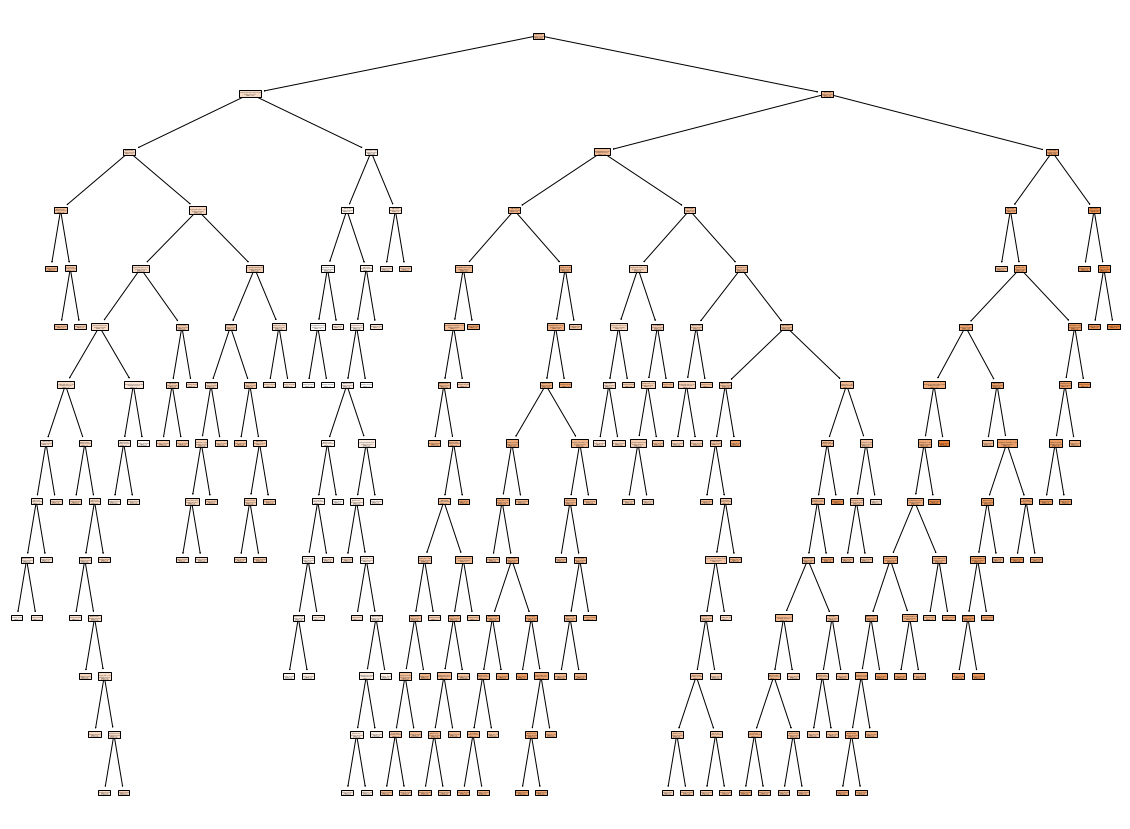

In [642]:
tree_model_new=DecisionTreeRegressor(max_depth=13,min_samples_split=13)
tree_model_new.fit(X_train,y_train)
plt.figure(figsize=(20,15))
tree.plot_tree(tree_model_new,filled=True,feature_names=X_train.columns);

In [643]:
compare_train_test(tree_model_new)

Training-model Accuracy: 92.99
Testing-model Accuracy: 85.72
Mean Absolute error of testing data: 1.1967237170824296
0.4237777567756824


### K Fold Cross Validation

In [644]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [645]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(tree_model_new,X,y,cv=kfold_validation))
print(np.mean(cross_val_score(tree_model_new,X,y,cv=kfold_validation)))

[0.70479724 0.83529978 0.80426057 0.80742397 0.84892331 0.86040274
 0.81902698 0.7786219  0.77412956 0.87246426]
0.8133861195830189


### Residual deviance

In [646]:
y_predicted=tree_model_new.predict(X_test)
NEW_DF=pd.DataFrame({'Actual':np.exp((y_test)),'Predicted':np.exp(y_predicted)})
NEW_DF['Error']=NEW_DF['Actual']-NEW_DF['Predicted']

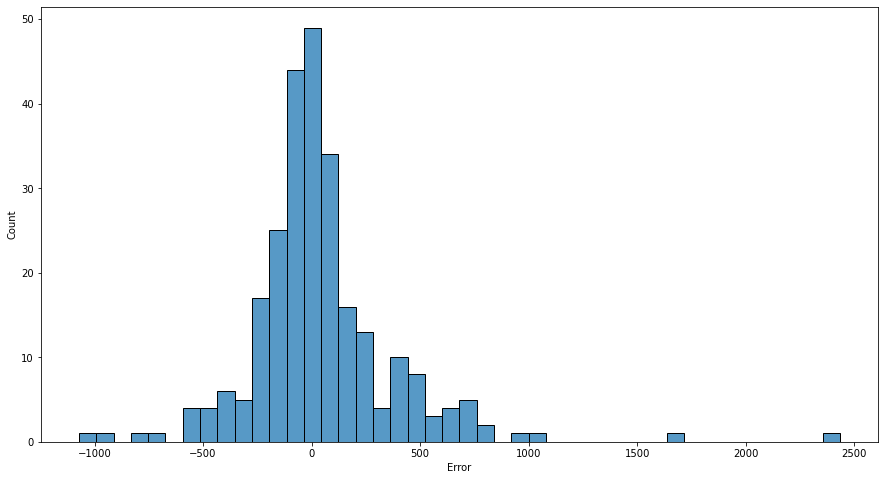

In [647]:
plt.figure(figsize=(15,8))
sns.histplot(data=NEW_DF,x='Error');

#### Distribution observerd for residual deviance is  normal distribution so our model is performing well without any pattern

### Function for a new data point

In [648]:
def com_name(name):
    ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia=[0 for i in range(19)]
    if name=='Dell':
        d=1
    elif name=='Lenovo':
        le=1
    elif name=='HP':
        h=1
    elif name=='Asus':
        asu=1
    elif name=='Acer':
        ac=1
    elif name=='MSI':
        msi=1
    elif name=='Toshiba':
        tos=1
    elif name=='Apple':
        app=1
    elif name=='Samsung':
        sam=1
    elif name=='Razer':
        ra=1  
    return ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia
def display(dis_type):
    t,i=0,0
    if dis_type=='Touchscreen':
        t=1
    elif dis_type=='IPS':
        i=0
    return t,i
def type_name(typ):
    co,ga,net,no,ul,wo=0,0,0,0,0,0
    if typ=='Notebook':
        no=1
    elif typ=='Gaming':
        ga=1
    elif typ=='Ultrabook':
        ul=1
    elif typ=='2 in 1':
        co=1
    elif typ=='Workstation':
        wo=1
    elif typ=='Netbook':
        net=1     
    return   co,ga,net,no,ul,wo
def cpu_brand(g_name):
    amd,i3,i5,i7,other=0,0,0,0,0
    if b_name=='AMD':
        amd=1
    elif b_name=='i3':
        i3=1
    elif b_name=='i5':
        i5=1
    elif b_name=='i7':
        i7=1
    else:
        other=1
    return amd,i3,i5,i7,other
def gpu_brand(g_name):
    amd,intel,nvidia=0,0,0
    if g_name=='AMD':
        amd=1
    elif b_name=='Intel':
        intel=1
    elif b_name=='Nvidia':
        nvidia=1
    return amd,intel,nvidia   
def os_type(os):
    wi,mac,oth=0,0,0
    if os=='Windows':
        wi=0
    elif os=='Mac':
        mac=0
    else:
        oth=0
    return wi,mac,oth    
def price_predictor(data):
    log_p=tree_model_new.predict([data])
    price_euros=np.exp(log_p)
    return price_euros
data=[]
print("Enter the Details of the Laptop")
name=input("Company name(Dell/Lenovo/HP/Asus/Acer/MSI/Toshiba/Apple/Samsung/Razer/others):")
ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia=com_name(name)
print("Display")
dis=input("Display_Type(IPS/Touchscreen):")
t,i=display(dis)
print("Type_Name")
t_name=input("Laptop type name(Notebook/Netbook/Gaming/Ultrabook/2 in 1/Workstation):")
co,ga,net,no,ul,wo=type_name(t_name)
Ram=int(input("RAM(in GB): "))
Weight=float(input("Weight(in kg): "))
x_res=int(input("X Resultion:"))
y_res=int(input("y Resolution:"))
inc=float(input("Inches:"))
PPI=(((x_res*2)+(y_res*2))*(1/2))/inc
SSD=int(input("SSD(in GB):"))
print("CPU")
b_name=input("CPU brand name(AMD/Intel-i3/i5/i7/Others):")
b_amd,i3,i5,i7,other=cpu_brand(b_name)
print("GPU")
g_name=input("GPU brand name(AMD/Intel/Nvidia):")
g_amd,intel,nvidia=gpu_brand(g_name)
print("Operating System")
os=input("Name of Operating System(Windows/Mac/others):")
wi,mac,oth=os_type(os)
data=[Ram,Weight,t,i,PPI,SSD,ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia,co,ga,net,no,ul,wo,b_amd,i3,i5,i7,other,g_amd,intel,nvidia,wi,mac,oth]
print("Predicted_price(in euros):",*price_predictor(data))

Enter the Details of the Laptop
Company name(Dell/Lenovo/HP/Asus/Acer/MSI/Toshiba/Apple/Samsung/Razer/others):Dell 
Display
Display_Type(IPS/Touchscreen):IPS
Type_Name
Laptop type name(Notebook/Netbook/Gaming/Ultrabook/2 in 1/Workstation):Workstation
RAM(in GB): 32
Weight(in kg): 1.5
X Resultion:1920
y Resolution:1080
Inches:13.5
SSD(in GB):512
CPU
CPU brand name(AMD/Intel-i3/i5/i7/Others):AMD
GPU
GPU brand name(AMD/Intel/Nvidia):AMD
Operating System
Name of Operating System(Windows/Mac/others):Windows
Predicted_price(in euros): 2688.2025307217978
